In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [12]:
sample_rate = 1e6

# Generate tone plus noise
t = np.arange(1024*1000)/sample_rate # time vector
f = 50e3 # freq of tone
x = np.sin(2*np.pi*f*t) + 0.2*np.random.randn(len(t)) + np.sin(2*np.pi*100e3*t)

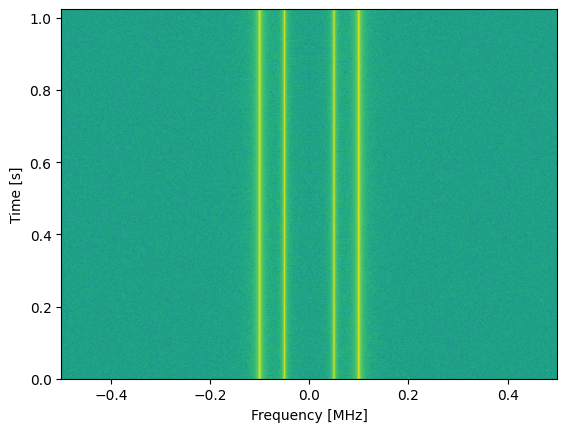

In [13]:
# simulate the signal above, or use your own signal

fft_size = 1024
num_rows = len(x) // fft_size # // is an integer division which rounds down
spectrogram = np.zeros((num_rows, fft_size))
for i in range(num_rows):
    spectrogram[i,:] = np.log10(np.abs(np.fft.fftshift(np.fft.fft(x[i*fft_size:(i+1)*fft_size])))**2)

plt.imshow(spectrogram, aspect='auto', extent = [sample_rate/-2/1e6, sample_rate/2/1e6, 0, len(x)/sample_rate])
plt.xlabel("Frequency [MHz]")
plt.ylabel("Time [s]")
plt.show()

In [14]:
def create_spectrogram(signal, fft_size):
    num_rows = len(signal) // fft_size # // is an integer division which rounds down
    spectrogram = np.zeros((num_rows, fft_size))
    for i in range(num_rows):
        spectrogram[i,:] = np.log10(np.abs(np.fft.fftshift(np.fft.fft(signal[i*fft_size:(i+1)*fft_size])))**2)
    return spectrogram

In [18]:
def plot_spectrogram(spectrogram, sample_rate, signal, MHz = False):
    if MHz:
        spectrogram_boundary = [sample_rate/-2/1e6, sample_rate/2/1e6, 0, len(signal)/sample_rate]
    else:
        spectrogram_boundary = [sample_rate/-2, sample_rate/2, 0, len(signal)/sample_rate]
    
    plt.imshow(spectrogram, aspect='auto', extent = spectrogram_boundary)
    plt.xlabel(f"Frequency [{'MHz' if MHz else 'Hz'}]")
    plt.ylabel("Time [s]")
    plt.show()

In [21]:
len(x)

1024000

In [19]:
s = create_spectrogram(x, 2**10)

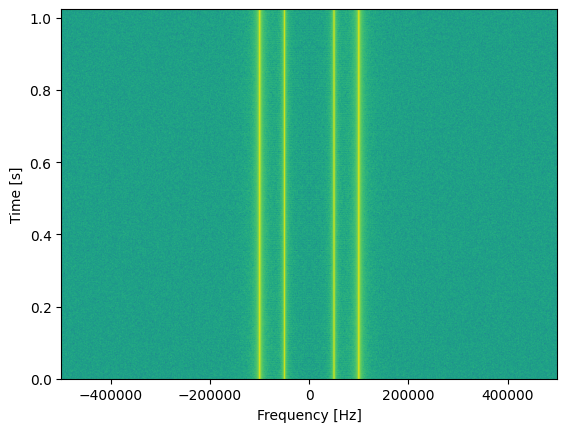

In [20]:
plot_spectrogram(s, sample_rate, x)

In [47]:
def square_plot(data):
    x = [-1]
    for i in range(len(data)):
        x.append(i)
        x.append(i)
        
    y  = [data[0]]
    for idx in range(len(data)-1):
        y.append(data[idx])
        y.append(data[idx+1])
    y.append(data[-1])
    
    plt.plot(x[:-1],y)
    
    
    # Can np repeats be used here?
    


[1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1]


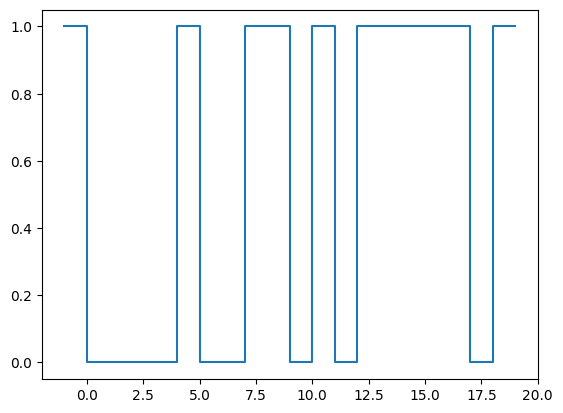

In [48]:
square_plot(data)

In [85]:
num_symbols = 3
data = [0,0,1,1,3,3,2,1,3,1,2,3,0,0]
repeated = np.array(data).repeat(num_symbols * 10)

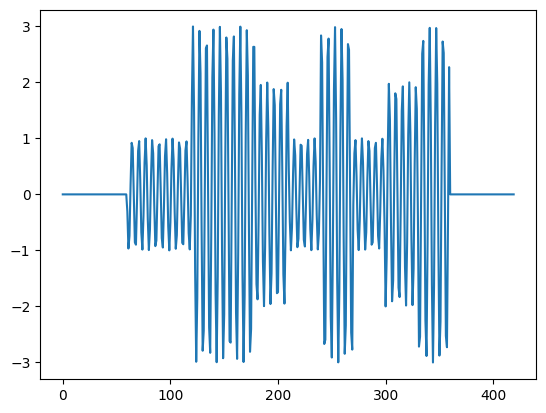

In [86]:
transmission = np.sin(np.arange(len(repeated))) * repeated
plt.plot(transmission)

# PSKs

In [148]:
data = [1,1,-1,-1,1,-1,-1,1,1,1,1,-1,1,-1]
repeated = np.array(data).repeat(20)

In [197]:
transmission = (np.cos(np.arange(len(repeated))) + np.sin(np.arange(len(repeated))))

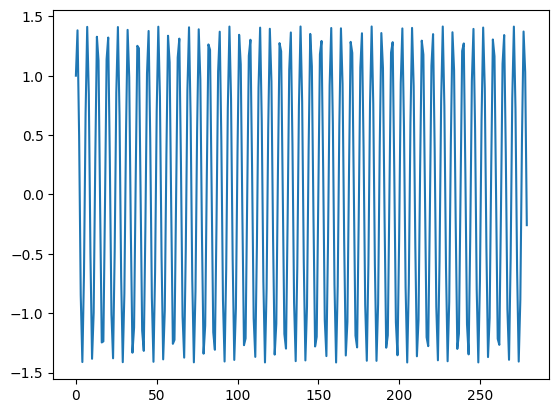

In [198]:
plt.plot(transmission)

<>:1: SyntaxWarning: tuple indices must be integers or slices, not tuple; perhaps you missed a comma?
<>:1: SyntaxWarning: tuple indices must be integers or slices, not tuple; perhaps you missed a comma?
/tmp/ipykernel_8192/1247037651.py:1: SyntaxWarning: tuple indices must be integers or slices, not tuple; perhaps you missed a comma?
  (0,1)[1,0,0]
/tmp/ipykernel_8192/1247037651.py:1: SyntaxWarning: tuple indices must be integers or slices, not tuple; perhaps you missed a comma?
  (0,1)[1,0,0]
/tmp/ipykernel_8192/1247037651.py:1: SyntaxWarning: tuple indices must be integers or slices, not tuple; perhaps you missed a comma?
  (0,1)[1,0,0]


TypeError: tuple indices must be integers or slices, not tuple

In [192]:
x_int = [np.pi if i == 1 else 0.0 for i in np.random.randint(0, 2, num_symbols)] # 0 to 3
x_radians = np.array(x_int).repeat(2*10)
x_symbols = np.cos(x_radians+ np.arange(len(x_radians))) + np.sin(x_radians+ np.arange(len(x_radians)))

In [200]:
def binary(sym, sym_len):
    rand_n = np.random.rand(sym)
    rand_n[np.where(rand_n >= 0.5)] = 1
    rand_n[np.where(rand_n <= 0.5)] = 0

    sig = np.zeros(int(sym*sym_len))

    # generating symbols
    id1 = np.where(rand_n == 1)

    for i in id1[0]:
        temp = int(i*sym_len)
        sig[temp:temp+sym_len] = 1
    return sig

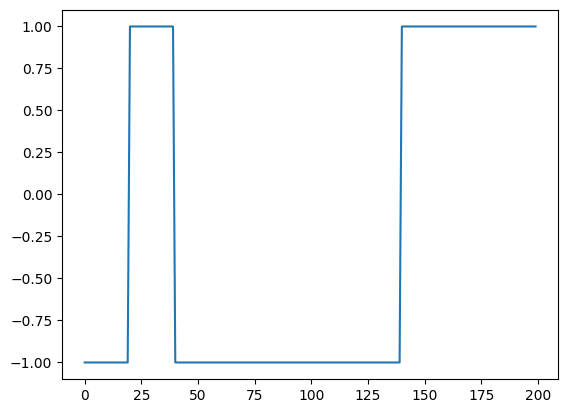

In [194]:
plt.plot(np.cos(x_radians) + np.sin(x_radians))

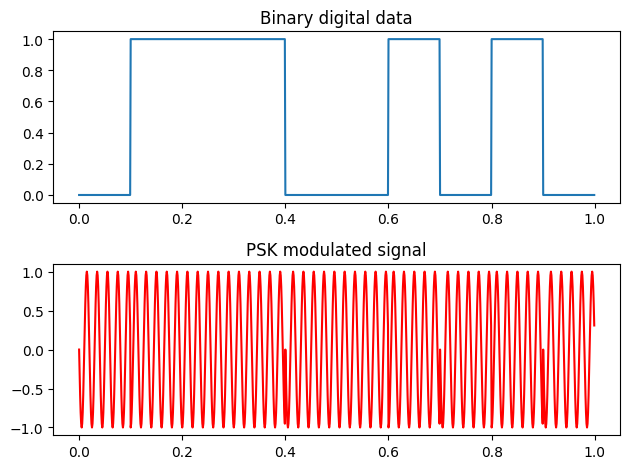

In [203]:
from math import pi
# Carrier wave and binary signal configuration parameters
Fs = 1000 # Samples per second
fc = 50 # Carrier frequency 50 Hz, 50 cycles/sec
T = 1 # Total simulation time in seconds
t = np.arange(0, T, 1/Fs)
Td = 0.1 # Bit duration
Nsamples = int(Td*Fs) # Samples in one bit duration
Nsym = int(np.floor(np.size(t)/Nsamples))
# Binary waveform generation
sig = binary(Nsym,Nsamples)
# PSK waveform generation
phase= pi + pi*sig/2
Xpsk = np.sin(2*pi*fc*t + phase)
# Binary waveform and PSK modulation waveform Plots
figure, axis = plt.subplots(2)
axis[0].plot(t, sig)
axis[0].set_title("Binary digital data")
axis[1].plot(t, Xpsk, 'r')
axis[1].set_title("PSK modulated signal")
plt.tight_layout()
plt.show()

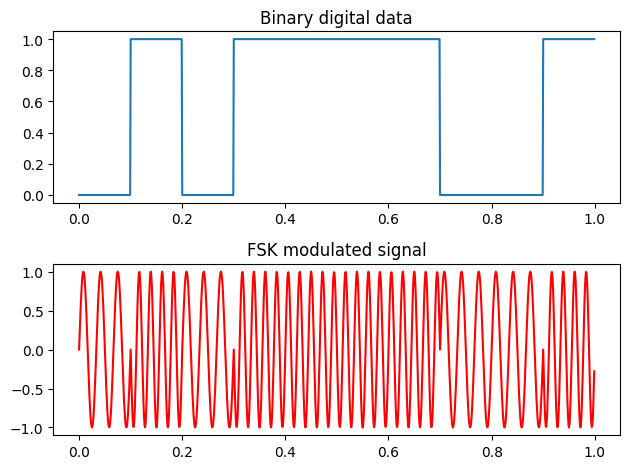

In [227]:

# Carrier wave and binary signal configuration parameters
Fs = 1000 # Samples per second
fc = 30 # Carrier frequency 30 Hz, 30 cycles/sec
T = 1 # Total simulation time in seconds, 1sec
t = np.arange(0, T, 1/Fs)
Td = 0.1 # Bit duration
Nsamples = int(Td*Fs) # Samples in one bit duration
Nsym = int(np.floor(np.size(t)/Nsamples))
# Binary waveform generation
sig = binary(Nsym,Nsamples)
# FSK waveform generation
f = fc + fc*sig/2
Xfsk = np.sin(2*pi*f*t)
# Binary waveform and FSK modulation waveform Plots
figure, axis = plt.subplots(2)
axis[0].plot(t, sig)
axis[0].set_title("Binary digital data")
axis[1].plot(t, Xfsk, 'r')
axis[1].set_title("FSK modulated signal")
plt.tight_layout()
plt.show()

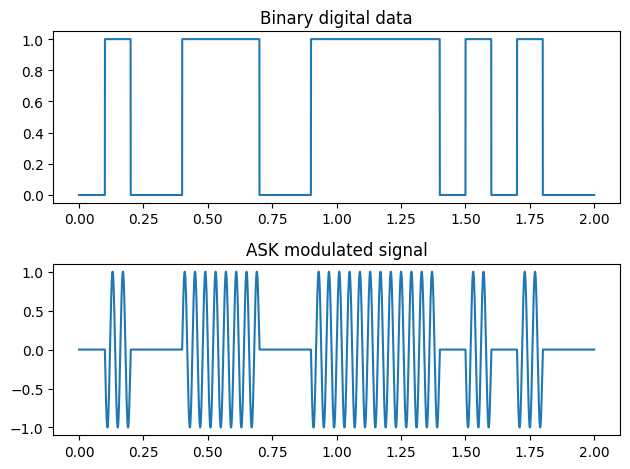

In [236]:
# Carrier wave and binary waveform configuration parameters
Fs = 10000 # Samples per second
fc = 25 # Carrier frequency 100 Hz, 100 cycles/sec
T = 2 # Total simulation time in seconds
t = np.arange(0, T, 1/Fs)
x =np.sin(2*pi*fc*t)
Td = 0.1 # Bit duration
Nsamples = int(Td*Fs) # Samples in one bit duration
Nsym = int(np.floor(np.size(t)/Nsamples))
# Python code to generate binary stream of data
sig = binary(Nsym, Nsamples)
# ASK waveform generation
Xask = x * sig
# Binary waveform and ASK waveform Plots
figure, axis = plt.subplots(2)
axis[0].plot(t,sig)
axis[0].set_title("Binary digital data")
axis[1].plot(t, Xask)
axis[1].set_title("ASK modulated signal")
plt.tight_layout()
plt.show()

In [238]:
t

array([0.0000e+00, 1.0000e-04, 2.0000e-04, ..., 1.9997e+00, 1.9998e+00,
       1.9999e+00])

# FSKs

In [119]:
data = [1,0,0,1,1,1,1,0,1,0,1,1,0,1,0,1,1,1,0,0,0,0,0,1]
repeated = np.array(data).repeat(20) + 1

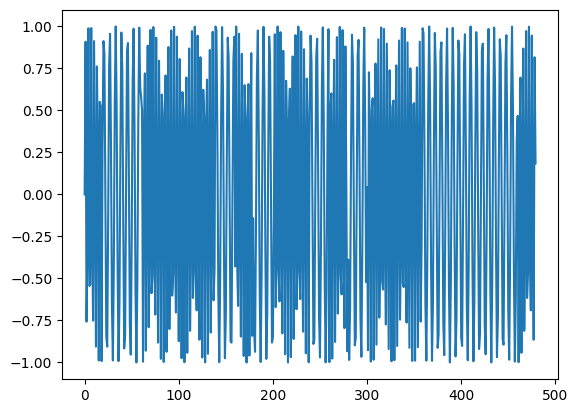

In [120]:
transmission = np.sin(repeated * np.arange(len(repeated)))
plt.plot(transmission)

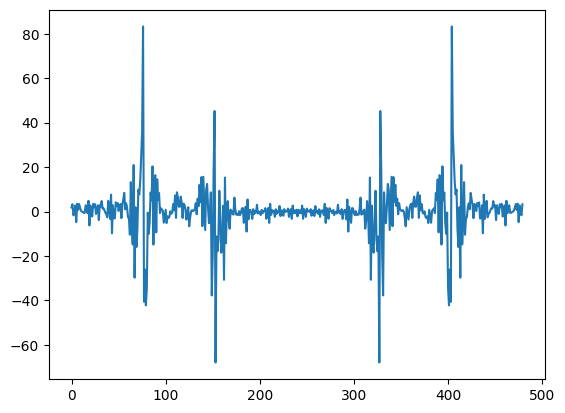

In [121]:
plt.plot(np.fft.fft(transmission))